[50 50 50]
[35 35 35]
[15 15 15]
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 2 1 0 1 2 1]
[2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 2 2 1]
0.9555555555555556


<ipython-input-12-5edec1dbf453>:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')


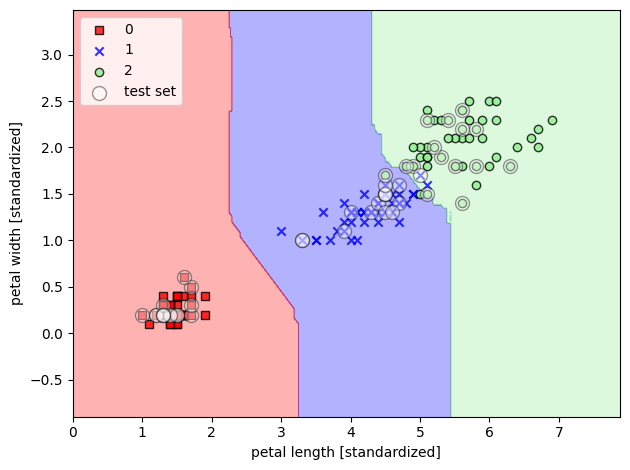

1.0
-0.39721374828980505


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

#print(iris)

X = iris.data
y = iris.target

#print("The input data:\n",X)
X = X[:,[2,3]]
#print("Last two columns of the X;\n",X)

y = iris.target

X_train,X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

from sklearn.neighbors import KNeighborsClassifier

# from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=15, algorithm='brute',metric='minkowski',p=1, n_jobs=-1)

knn.fit(X_train,y_train)

test_results= knn.predict(X_test)

print(test_results)
print(y_test)
print(knn.score(X_test,y_test))


from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02,test_idx = None):
# setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='white', edgecolor='black', alpha=0.4, linewidth=1, marker='o', s=100, label='test set')


X_combined = np.concatenate((X_train, X_test),axis=0)
y_combined = np.concatenate((y_train, y_test),axis=0)


plot_decision_regions(X_combined, y_combined,
                      classifier=knn,test_idx = range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()


from sklearn.neighbors import KNeighborsRegressor

data = np.random.uniform(low=0, high=100,size=(100,3))
X = data[:,[0,1]]
y = data[:,[2]]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3)

# X_combined = np.concatenate((X_train, X_test),axis=0)
# y_combined = np.concatenate((y_train, y_test),axis=0)

#knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute',metric='minkowski',p=2, n_jobs=-1)
knn_reg = KNeighborsRegressor(n_neighbors=3, weights='distance',p=2,metric="minkowski",n_jobs=-1)
knn_reg.fit(X_train, y_train)

print(knn_reg.score(X_train,y_train))
print(knn_reg.score(X_test,y_test))

